# 1. Import Modules, Load Data and Data Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
from sklearn import metrics
import numpy as np

In [5]:
import pickle

In [6]:
with open('golden_data_dummy.pkl', 'rb') as f:
    data = pickle.load(f)

In [7]:
data.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [8]:
data.isnull().sum()

displacement                  0
hp                            0
km                            0
ss_abs                        0
ss_adaptive_cruise_control    0
                             ..
type_Demonstration            0
type_Employee's car           0
type_New                      0
type_Pre-registered           0
type_Used                     0
Length: 136, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [10]:
data.columns.values

array(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system',
       'ss_blind_spot_monitor', 'ss_central_door_lock',
       'ss_central_door_lock_with_remote_control',
       'ss_daytime_running_lights', 'ss_driver_drowsiness_detection',
       'ss_driver_side_airbag', 'ss_electronic_stability_control',
       'ss_emergency_brake_assistant', 'ss_emergency_system',
       'ss_fog_lights', 'ss_head_airbag', 'ss_immobilizer', 'ss_isofix',
       'ss_led_daytime_running_lights', 'ss_led_headlights',
       'ss_lane_departure_warning_system', 'ss_night_view_assist',
       'ss_passenger_side_airbag', 'ss_power_steering', 'ss_rear_airbag',
       'ss_side_airbag', 'ss_tire_pressure_monitoring_system',
       'ss_traction_control', 'ss_traffic_sign_recognition',
       'ss_xenon_headlights', 'consumption_comb', 'inspection_new',
       'price', 'age', 'ent_media_bluetooth', 'ent_media_cd_player',
       'ent_media_digital_radio

# 2. Data Pre-Processing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('price',axis=1)
y = data['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Implement Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.score(X_train, y_train)

0.8902134555790087

In [17]:
y_pred = model.predict(X_test)

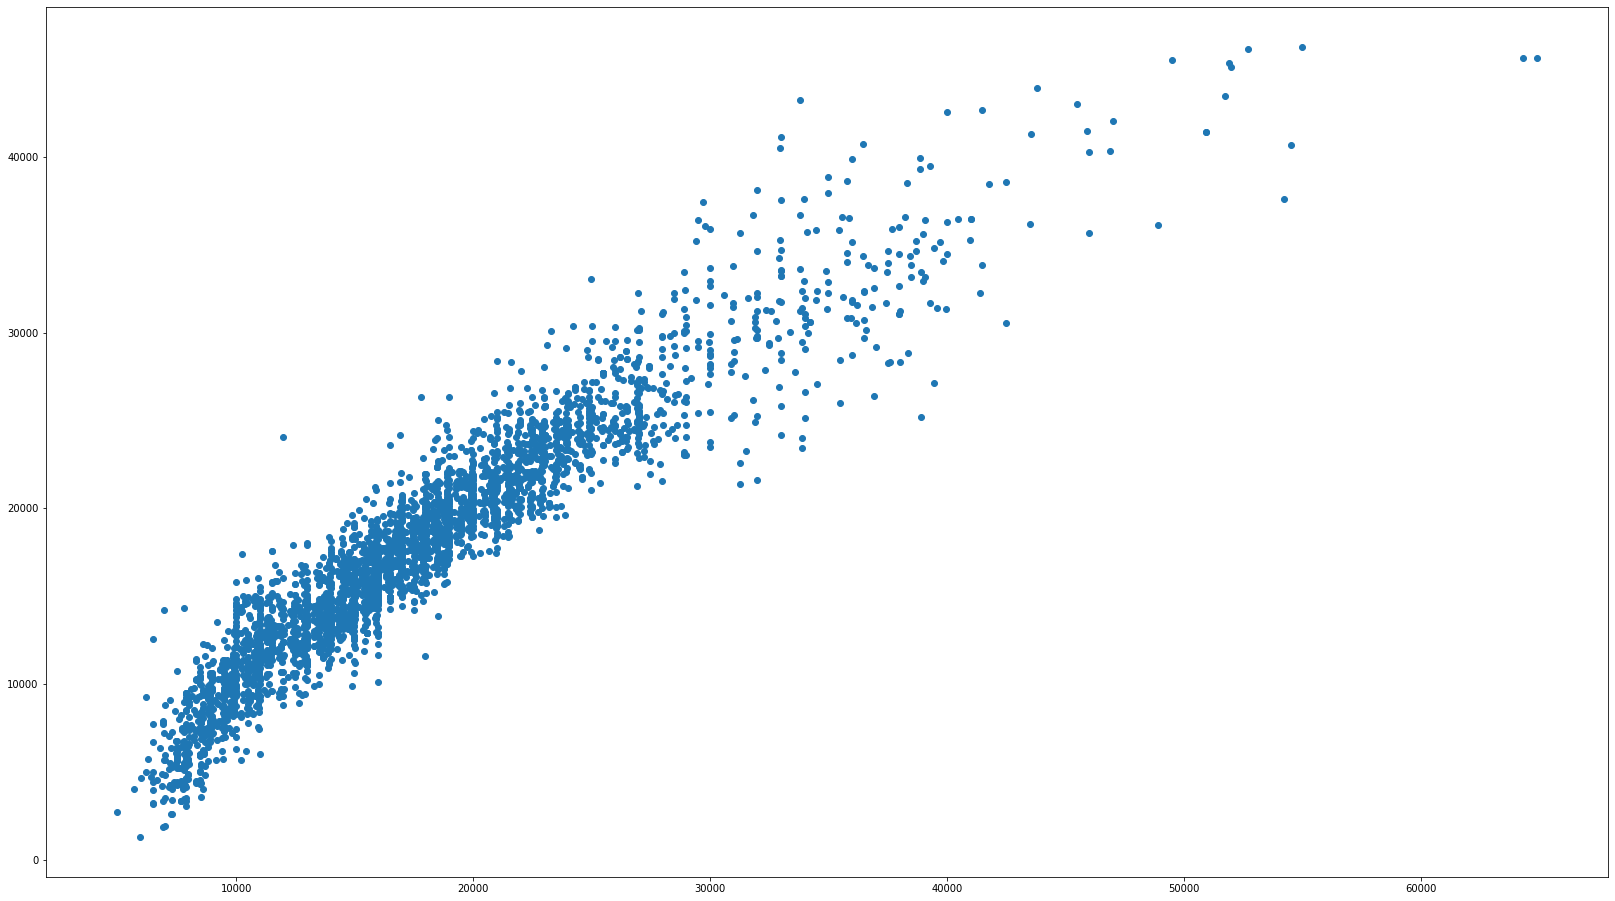

In [18]:
plt.figure(figsize=(28,16))
plt.scatter(y_test, y_pred);

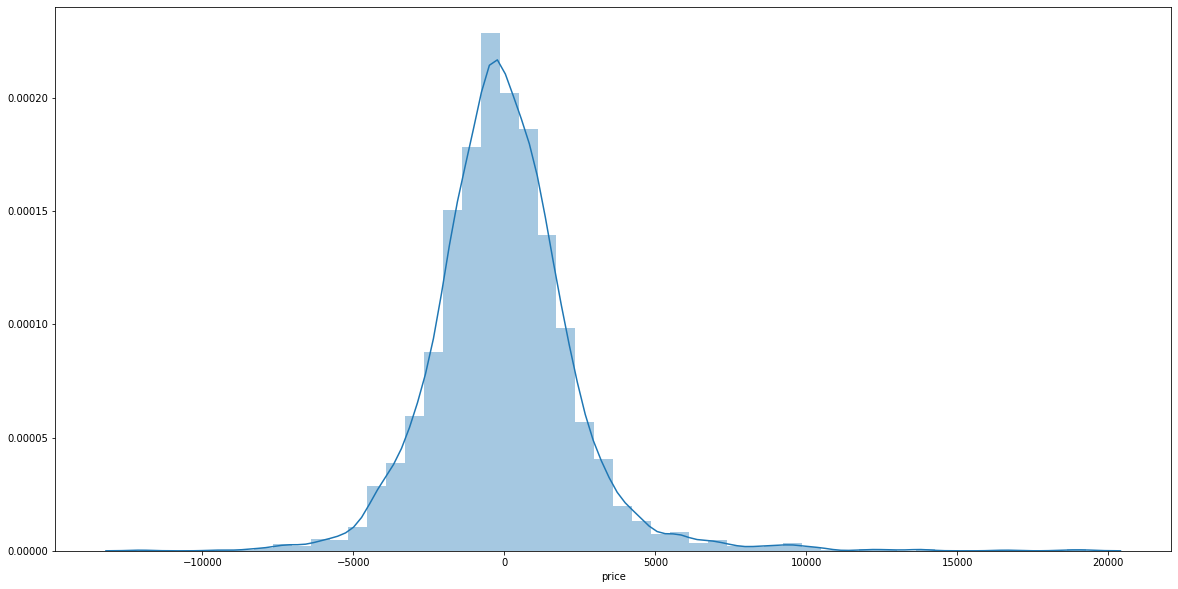

In [19]:
plt.figure(figsize=(20,10))
sns.distplot((y_test-y_pred), bins = 50);

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1658.8190343424355
MSE: 5334910.266717253
RMSE: 2309.7424676178193


In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [38]:
eval_metrics(y_test, y_pred)

r2_score: 0.8942648055028471 
 mae: 1658.79555611052 
 mse: 5334794.782848362 
 rmse: 2309.7174681870424


In [39]:
metrics.explained_variance_score(y_test, y_pred)

0.8943047793609299

In [40]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [41]:
compare.sample(20)

,Actual,Pred
8662,7490,5663.315594
9699,14325,14898.846032
11283,15970,16451.111327
13825,8600,4018.973226
4417,23690,22996.662085
9239,8399,7401.186180
10033,15850,15693.433706
13989,8900,8468.942522
13603,7900,3310.301283
10750,11790,14507.376012


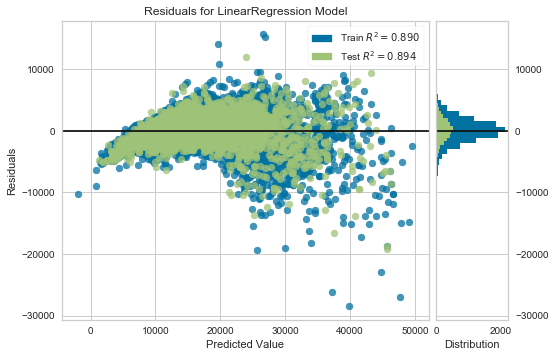

In [42]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer

visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

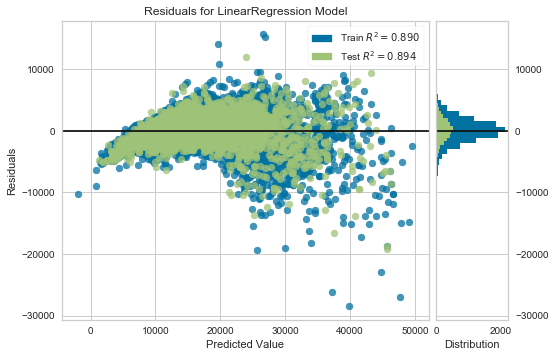

In [43]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# 4. Implement Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [45]:
ridge_model =  Ridge(normalize = True)

In [46]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [47]:
y_pred = ridge_model.predict(X_test)

In [48]:
eval_metrics(y_test, y_pred)

r2_score: 0.838744156308244 
 mae: 1958.879031083311 
 mse: 8136050.042010899 
 rmse: 2852.3762097610647


In [49]:
alpha_space = np.linspace(0.1, 20, 50)

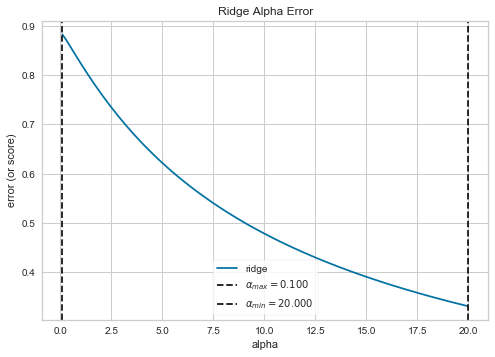

In [50]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [52]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8923684137253707 
 mae: 1657.1575034760745 
 mse: 5430475.894599571 
 rmse: 2330.3381502690913


In [53]:
ridge_model = Ridge(0.0001, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8942648055028471 
 mae: 1658.79555611052 
 mse: 5334794.782848362 
 rmse: 2309.7174681870424


# 5. Implement Lasso Regression

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [57]:
scaled_data=pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_data.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,0.609523,1.104732,0.515740,0.230038,-0.29837,-0.391638,-0.386334,-0.300662,-2.479285,-0.425740,-1.564082,-0.180838,0.267363,-2.818424,-0.491311,-0.323828,-1.154701,-0.401552,-1.548023,-1.993574,-0.770376,-0.496746,-0.482785,-0.067507,0.326004,-3.239581,-0.245491,0.344232,-1.606672,0.585088,-0.378233,-0.543425,-0.231437,-0.543013,1.390104,0.478016,-0.677674,-0.411209,-1.355000,-0.778902,0.444251,0.439217,-0.402746,-0.049066,0.859594,0.531927,4.198180,-1.454004,-4.591998,-0.060501,-0.966062,-1.179148,-0.135947,0.597282,0.0,-0.262944,-1.989168,-0.379922,-0.248128,-0.191329,-0.507993,-0.903251,-0.451979,-0.055078,-1.307505,-1.011451,-0.520163,-0.152956,-1.715972,-1.108706,-0.194306,-1.449566,-0.540266,-0.229609,-0.800131,-1.350786,-3.632416,-1.141999,-0.929535,-0.241804,-0.428215,-1.187376,-0.159528,-0.321813,-0.051727,-0.026686,0.370511,-0.643082,-0.21325,-0.638663,-0.743192,-0.920265,2.094440,-0.433729,-0.009432,-0.495910,-0.435754,-0.370977,-0.407803,3.803097,-0.43054,-0.493403,-0.023108,-0.041145,-0.028306,-0.133552,-1.008217,-0.535592,-0.07626,4.319010,-0.085719,-0.591527,-0.314864,-0.021094,-0.137298,-0.100765,1.846247,-0.016338,-0.256504,-0.347617,-0.038916,-0.520991,-0.051727,1.082178,-1.015961,-0.180313,1.057513,-0.009432,-1.048871,-0.063395,-0.236189,-0.268507,-0.238697,-0.312812,0.597557
1,0.683143,2.744160,1.013891,0.230038,-0.29837,-0.391638,-0.386334,-0.300662,-2.479285,-0.425740,0.639353,-0.180838,0.267363,0.354808,-0.491311,-0.3

In [58]:
scaled_data.shape

(11242, 135)

In [59]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [38]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [60]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8942890191151263 
 mae: 1658.3821509237362 
 mse: 5333573.102091308 
 rmse: 2309.4529876339348


In [61]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, cv=10)
cv_scores.mean()

0.8858543682301276

In [62]:
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
np.sqrt(-cv_scores.mean())

2459.283138109819

In [63]:
y.mean()

17693.417611741163

In [64]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(scaled_X_train, y_train)

In [65]:
lasso_cv_model.alpha_

5.3795918367346935

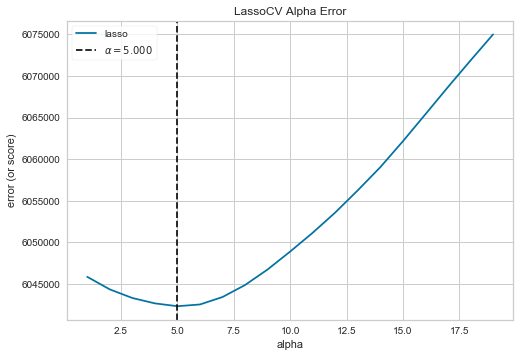

In [66]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = range(1,20)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(scaled_X_train, y_train)
visualizer.show()

In [67]:
lasso_model = Lasso(5.37959).fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8943105668476098 
 mae: 1657.1894115819932 
 mse: 5332485.926422109 
 rmse: 2309.217600492017


In [68]:
# deneme icin lambda(alpha yuksek)
lasso_model = Lasso(117).fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8855374787866891 
 mae: 1692.0882657167724 
 mse: 5775125.906794293 
 rmse: 2403.1491644911043


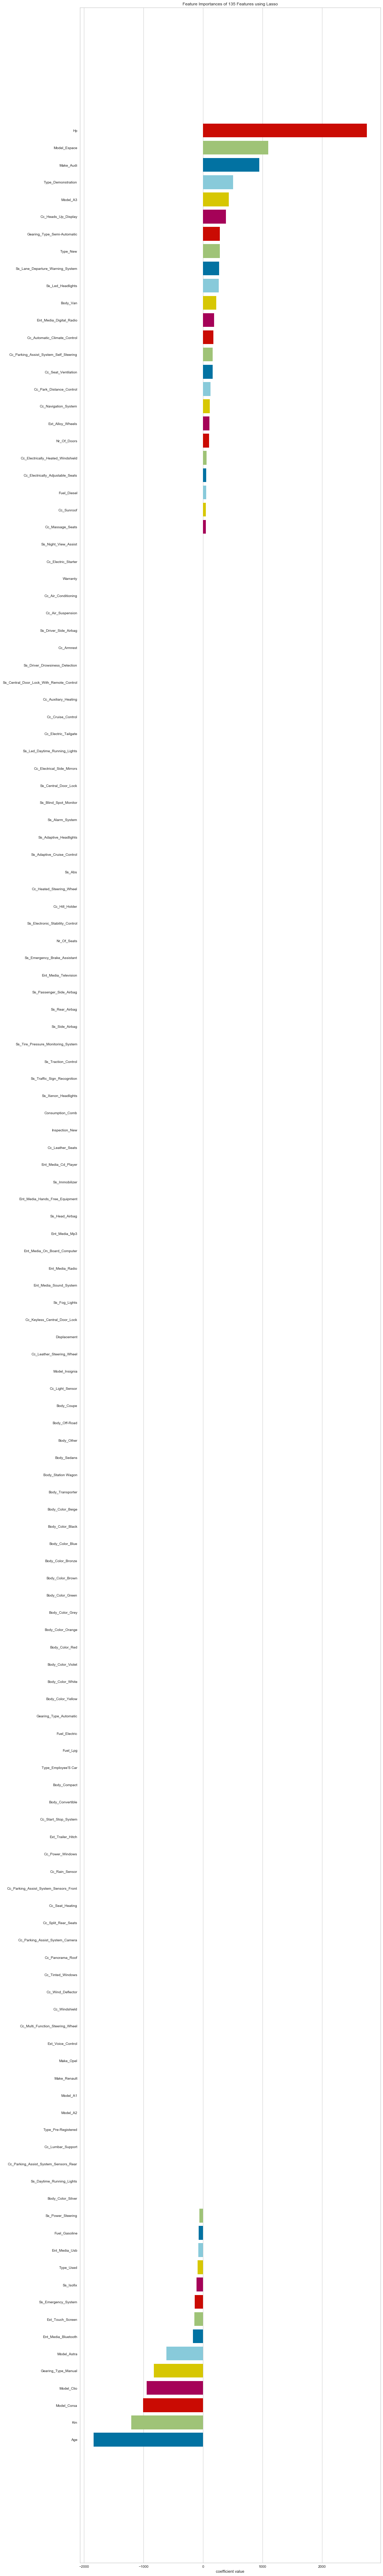

In [69]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(scaled_X_train, y_train)
viz.show()

In [70]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

40

In [71]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
1,hp,2752.603868
99,model_Espace,1095.570039
90,make_Audi,947.225446
130,type_Demonstration,506.076691
95,model_A3,431.564331
59,cc_heads_up_display,383.572983
125,gearing_type_Semi-automatic,282.824865
132,type_New,281.750867
22,ss_lane_departure_warning_system,268.633969
21,ss_led_headlights,265.133905


In [72]:
significant_features["features"]

1                                          hp
2                                          km
10                  ss_daytime_running_lights
15                        ss_emergency_system
19                                  ss_isofix
21                          ss_led_headlights
22           ss_lane_departure_warning_system
25                          ss_power_steering
34                                        age
35                        ent_media_bluetooth
37                    ent_media_digital_radio
44                              ent_media_usb
45                                nr_of_doors
51               cc_automatic_climate_control
57           cc_electrically_adjustable_seats
58          cc_electrically_heated_windshield
59                        cc_heads_up_display
67                           cc_massage_seats
69                       cc_navigation_system
71                   cc_park_distance_control
73     cc_parking_assist_system_self_steering
79                        cc_seat_

In [73]:
X_new=X[significant_features.features]

In [74]:
X_new.shape

(14990, 40)

In [75]:
y.shape

(14990,)

In [76]:
X_new.head()

,hp,km,ss_daytime_running_lights,ss_emergency_system,ss_isofix,ss_led_headlights,ss_lane_departure_warning_system,ss_power_steering,age,ent_media_bluetooth,ent_media_digital_radio,ent_media_usb,nr_of_doors,cc_automatic_climate_control,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_massage_seats,cc_navigation_system,cc_park_distance_control,cc_parking_assist_system_self_steering,cc_seat_ventilation,cc_sunroof,ext_alloy_wheels,ext_touch_screen,make_Audi,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,body_Van,body_color_Silver,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_gasoline,type_Demonstration,type_New,type_Used
0,66.0,56013,1.0,0.0,1.0,0.0,0.0,1.0,3,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,141.0,80000,1.0,0.0,1.0,0.0,0.0,1.0,2,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,85.0,83450,1.0,0.0,1.0,0.0,0.0,1.0,3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,66.0,73000,0.0,1.0,1.0,0.0,0.0,1.0,3,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,66.0,16200,0.0,0.0,1.0,0.0,0.0,1.0,3,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


**Linear Regression with Reduced Columns**

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [78]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = lm.predict(X_test)

In [80]:
eval_metrics(y_test, y_pred)

r2_score: 0.8822320224276957 
 mae: 1700.4956446748613 
 mse: 5948514.41585669 
 rmse: 2438.9576494594344


**Linear Regression with Original Columns**

In [81]:
#let's try the linear reg with original dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8841095188155331 
 mae: 1676.914543216925 
 mse: 5853681.21451456 
 rmse: 2419.438202251622


**Polynomial Regression with Reduced Columns**

In [62]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X_new)
poly_features.shape

(14990, 860)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9384151758105163 
 mae: 1161.0261212158616 
 mse: 3115385.9414396468 
 rmse: 1765.0455918869764


# 6. Implement Random Forest Method

In [82]:
X.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [83]:
y.head(3)

0    15770
1    14500
2    14640
Name: price, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
y_head=rfc.predict(X_test)

In [90]:
eval_metrics(y_test, y_head)

r2_score: 0.959281374541282 
 mae: 857.3462354472586 
 mse: 2063107.790609588 
 rmse: 1436.352251576746


In [89]:
print('r2 score:',r2_score(y_test,y_head))

r2 score: 0.959281374541282


# r2_scores:
    
Linear Regression: 89.4
Ridge Regression:  89.4
Lasso Regression:  89.4
Random Forest:     95.9